In [25]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 
import pydot
from IPython.display import Image, display
import io
from PIL import Image
# import Coverage as cov
# import RuleQuality as RQ

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def showGraph(dotGraph, title=None):
    plt.figure(figsize=[40,25])
#     plt.figure()
    img = Image.open(io.BytesIO(dotGraph.create_png()))  # .show()
    plt.imshow(img)  # to show in pycharm sciview
    if title != None:
        plt.title(title)
#     plt.show()

def saveGraph(dotgraph, graphName):
    dotGraph.write(graphName, format='png') #to save to file

def addBranch(dotGraph, nodeNames, parentName, rev=False):
    brID = "[" + ' '.join(map(str, nodeNames)) + "]"
    
    clusterBranch = pydot.Cluster(brID, label=brID)
    dotGraph.add_subgraph(clusterBranch)
    
    if rev:
        nodenames = nodeNames.reverse()
    for n in nodeNames:
        #add node to dot graph
        clusterBranch.add_node(pydot.Node(n))
        if parentName != None:
            dotGraph.add_edge(pydot.Edge(parentName, n))  # connect edge btw parent and node
            
    return dotGraph

In [ ]:
# Make example template tree
dotGraph = pydot.Dot(graph_type='digraph', forcelabels=True) # Make pydot graph to visualize rule template

dotGraph = addBranch(dotGraph, nodeNames=['eval#1'], parentName=None)
dotGraph = addBranch(dotGraph, nodeNames=['stlTerm#1'], parentName='eval#1')
dotGraph = addBranch(dotGraph, nodeNames=['BoolAtomic#1', 'timeBound#1', 'U#1', 'BoolAtomic#2'], parentName='stlTerm#1')
dotGraph = addBranch(dotGraph, nodeNames=['F#1', 'timeBound#2', 'BoolAtomic#3'], parentName='stlTerm#1', rev=True)
dotGraph = addBranch(dotGraph, nodeNames=['G#1', 'timeBound#3', 'BoolAtomic#4'], parentName='stlTerm#1', rev=True)
dotGraph = addBranch(dotGraph, nodeNames=['>=#1'], parentName='BoolAtomic#1')
dotGraph = addBranch(dotGraph, nodeNames=['<=#1'], parentName='BoolAtomic#1')
dotGraph = addBranch(dotGraph, nodeNames=['boolExpr#1'], parentName='BoolAtomic#1')
dotGraph = addBranch(dotGraph, nodeNames=['>=#2'], parentName='BoolAtomic#2')
dotGraph = addBranch(dotGraph, nodeNames=['<=#2'], parentName='BoolAtomic#2')
dotGraph = addBranch(dotGraph, nodeNames=['boolExpr#2'], parentName='BoolAtomic#2')
dotGraph = addBranch(dotGraph, nodeNames=['>=#3'], parentName='BoolAtomic#3')
dotGraph = addBranch(dotGraph, nodeNames=['<=#3'], parentName='BoolAtomic#3')
dotGraph = addBranch(dotGraph, nodeNames=['boolExpr#3'], parentName='BoolAtomic#3')
dotGraph = addBranch(dotGraph, nodeNames=['>=#4'], parentName='BoolAtomic#4')
dotGraph = addBranch(dotGraph, nodeNames=['<=#4'], parentName='BoolAtomic#4')
dotGraph = addBranch(dotGraph, nodeNames=['boolExpr#4'], parentName='BoolAtomic#4')

dotGraph = addBranch(dotGraph, nodeNames=['var#1', 'param#1'], parentName='>=#1')
dotGraph = addBranch(dotGraph, nodeNames=['....'], parentName='>=#1')

dotGraph = addBranch(dotGraph, nodeNames=['...'], parentName='boolExpr#4')
dotGraph = addBranch(dotGraph, nodeNames=['stlTerm#2', 'AND#1', 'stlTerm#3'], parentName='boolExpr#4')
dotGraph = addBranch(dotGraph, nodeNames=['stlTerm#4', 'OR#1', 'stlTerm#5'], parentName='boolExpr#4')
dotGraph = addBranch(dotGraph, nodeNames=['stlTerm#6', 'IMPLIES#1', 'stlTerm#7'], parentName='boolExpr#4')



showGraph(dotGraph)
saveGraph(dotGraph, 'exampleTemplateTree.png')

## Calculate Client Data Stats

In [ ]:
#Load original raw data from clients as dataframe
def calculateClientDataStats(popSize, dataFilename):
    sliceSizes = []
    
    data = pd.DataFrame()
    labels = pd.DataFrame()
    for i in range(1, popSize+1):

        try:
            dt = pd.read_csv(dataFilename + str(i) + 'DataFrame.csv', index_col=0)
            lbls = pd.read_csv(dataFilename + str(i) + 'Labels.csv', index_col=0)

            data = data.append(dt)
            labels = labels.append(lbls)
            
            sliceSizes.append(len(dt))

        except:
            print("Data file not found for Client %d" % (i))

    labels = labels.reset_index()
    
    print("\n\nTotal Rows:", len(data), "Average Rows / Patient:", sum(sliceSizes) / len(sliceSizes))
    
    return data, labels

In [ ]:
df1 = pd.read_csv("../Data/ICU/DataFrames/1DataFrame.csv", index_col=0)
df1

In [ ]:
data, labels = calculateClientDataStats(8000, "../Data/ICU/DataFrames/")

In [ ]:
df2 = pd.read_csv("../Data/Sepsis/DataFrames/1DataFrame.csv", index_col=0)
df2

In [ ]:
data, labels = calculateClientDataStats(40336, "../Data/Sepsis/DataFrames/")

In [ ]:
df3 = pd.read_csv("../Data/T1D/DataFrames/1DataFrame.csv", index_col=0)
df3

In [ ]:
data, labels = calculateClientDataStats(34013, "../Data/T1D/DataFrames/")

In [74]:
def showGraph(dotGraph, title=None):
    plt.figure(figsize=[40,25])
#     plt.figure()
    img = Image.open(io.BytesIO(dotGraph.create_png()))  # .show()
    plt.imshow(img)  # to show in pycharm sciview
    if title != None:
        plt.title(title)
#     plt.show()

def saveGraph(dotgraph, graphName):
    dotGraph.write(graphName, format='png') #to save to file

def addBranch(dotGraph, nodeNames, parentName, rev=False):
    brID = "[" + ' '.join(map(str, nodeNames)) + "]"
    
    clusterBranch = pydot.Cluster(brID, label=brID)
    dotGraph.add_subgraph(clusterBranch)
    
    if rev:
        nodenames = nodeNames.reverse()
    for n in nodeNames:
        #add node to dot graph
        clusterBranch.add_node(pydot.Node(n))
        if parentName != None:
            dotGraph.add_edge(pydot.Edge(parentName, n))  # connect edge btw parent and node
            
    return dotGraph

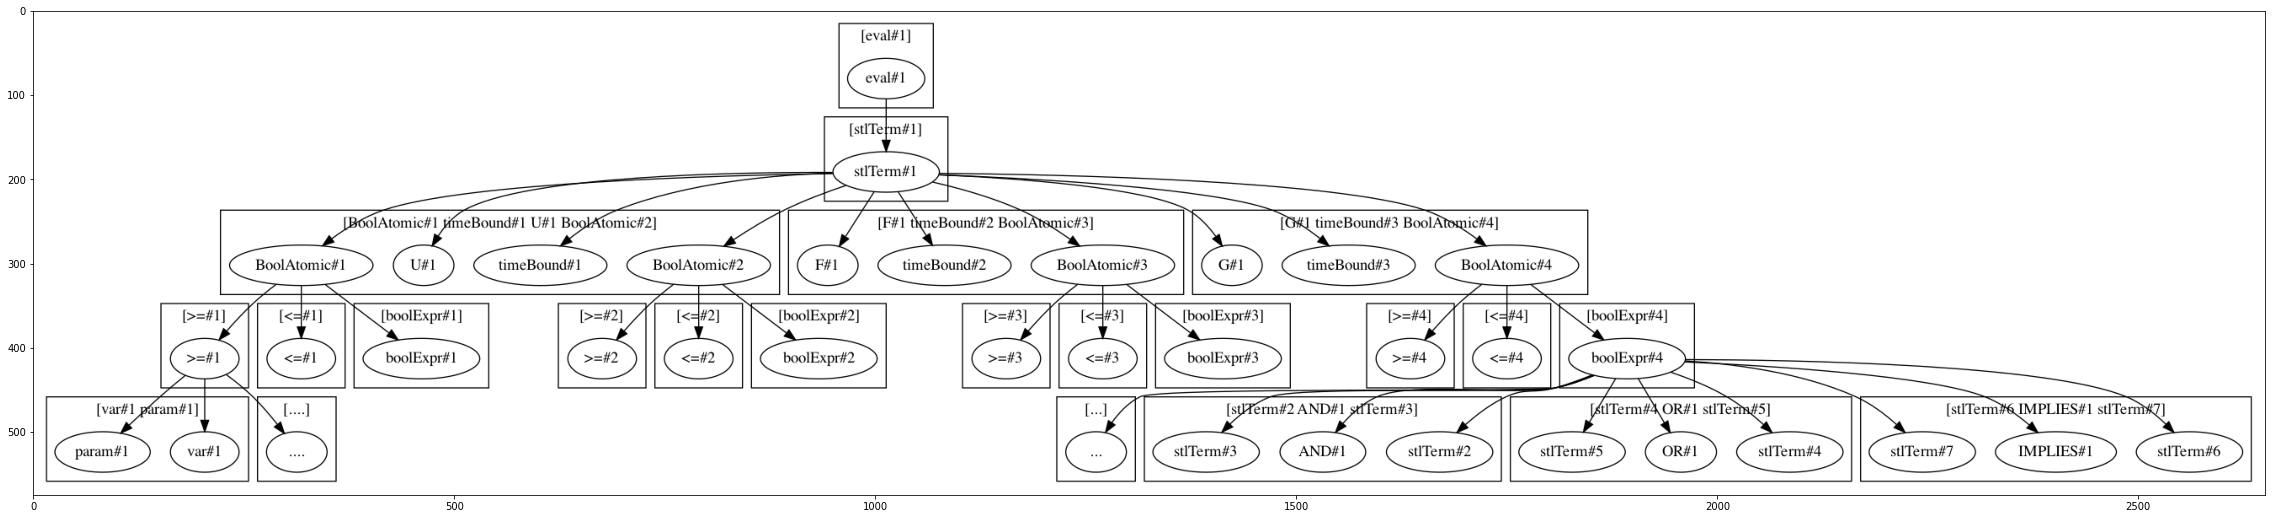

In [82]:
# Make example template tree
dotGraph = pydot.Dot(graph_type='digraph', forcelabels=True) # Make pydot graph to visualize rule template

dotGraph = addBranch(dotGraph, nodeNames=['eval#1'], parentName=None)
dotGraph = addBranch(dotGraph, nodeNames=['stlTerm#1'], parentName='eval#1')
dotGraph = addBranch(dotGraph, nodeNames=['BoolAtomic#1', 'timeBound#1', 'U#1', 'BoolAtomic#2'], parentName='stlTerm#1')
dotGraph = addBranch(dotGraph, nodeNames=['F#1', 'timeBound#2', 'BoolAtomic#3'], parentName='stlTerm#1', rev=True)
dotGraph = addBranch(dotGraph, nodeNames=['G#1', 'timeBound#3', 'BoolAtomic#4'], parentName='stlTerm#1', rev=True)
dotGraph = addBranch(dotGraph, nodeNames=['>=#1'], parentName='BoolAtomic#1')
dotGraph = addBranch(dotGraph, nodeNames=['<=#1'], parentName='BoolAtomic#1')
dotGraph = addBranch(dotGraph, nodeNames=['boolExpr#1'], parentName='BoolAtomic#1')
dotGraph = addBranch(dotGraph, nodeNames=['>=#2'], parentName='BoolAtomic#2')
dotGraph = addBranch(dotGraph, nodeNames=['<=#2'], parentName='BoolAtomic#2')
dotGraph = addBranch(dotGraph, nodeNames=['boolExpr#2'], parentName='BoolAtomic#2')
dotGraph = addBranch(dotGraph, nodeNames=['>=#3'], parentName='BoolAtomic#3')
dotGraph = addBranch(dotGraph, nodeNames=['<=#3'], parentName='BoolAtomic#3')
dotGraph = addBranch(dotGraph, nodeNames=['boolExpr#3'], parentName='BoolAtomic#3')
dotGraph = addBranch(dotGraph, nodeNames=['>=#4'], parentName='BoolAtomic#4')
dotGraph = addBranch(dotGraph, nodeNames=['<=#4'], parentName='BoolAtomic#4')
dotGraph = addBranch(dotGraph, nodeNames=['boolExpr#4'], parentName='BoolAtomic#4')

dotGraph = addBranch(dotGraph, nodeNames=['var#1', 'param#1'], parentName='>=#1')
dotGraph = addBranch(dotGraph, nodeNames=['....'], parentName='>=#1')

dotGraph = addBranch(dotGraph, nodeNames=['...'], parentName='boolExpr#4')
dotGraph = addBranch(dotGraph, nodeNames=['stlTerm#2', 'AND#1', 'stlTerm#3'], parentName='boolExpr#4')
dotGraph = addBranch(dotGraph, nodeNames=['stlTerm#4', 'OR#1', 'stlTerm#5'], parentName='boolExpr#4')
dotGraph = addBranch(dotGraph, nodeNames=['stlTerm#6', 'IMPLIES#1', 'stlTerm#7'], parentName='boolExpr#4')



showGraph(dotGraph)
saveGraph(dotGraph, 'exampleTemplateTree.png')

## Calculate Client Data Stats

In [18]:
#Load original raw data from clients as dataframe
def calculateClientDataStats(popSize, dataFilename):
    sliceSizes = []
    
    data = pd.DataFrame()
    labels = pd.DataFrame()
    for i in range(1, popSize+1):

        try:
            dt = pd.read_csv(dataFilename + str(i) + 'DataFrame.csv', index_col=0)
            lbls = pd.read_csv(dataFilename + str(i) + 'Labels.csv', index_col=0)

            data = data.append(dt)
            labels = labels.append(lbls)
            
            sliceSizes.append(len(dt))

        except:
            print("Data file not found for Client %d" % (i))

    labels = labels.reset_index()
    
    print("\n\nTotal Rows:", len(data), "Average Rows / Patient:", sum(sliceSizes) / len(sliceSizes))
    
    return data, labels

In [19]:
df1 = pd.read_csv("../Data/ICU/DataFrames/1DataFrame.csv", index_col=0)
df1

,LOS,ICU_Pt_Days,Mort,n_evts,y,tte,death,direct,MET,Sgy,...,edrk,s2_edrk,s8_edrk,s24_edrk,srr,dfa,cosen,lds,af,AF
1,4,1,0,0,False,0.0,0.0,0.0,0.0,0.0,...,23.527702,0.000002,0.000001,-4.918909e-07,0.027926,0.722903,-2.391665,1.670820,0.0,0.0
1,4,1,0,0,False,0.0,0.0,0.0,0.0,0.0,...,25.659513,0.002369,0.002369,2.368679e-03,0.031948,0.728738,-2.432732,1.995264,0.0,0.0
1,4,1,0,0,False,0.0,0.0,0.0,0.0,0.0,...,26.504228,0.001654,0.001654,1.653626e-03,0.023217,0.804216,-2.459413,2.058334,0.0,0.0
1,4,1,0,0,False,0.0,0.0,0.0,0.0,0.0,...,26.203203,0.000986,0.000986,9.856909e-04,0.010812,0.974394,-2.455503,1.986356,0.0,0.0
1,4,1,0,0,False,0.0,0.0,0.0,0.0,0.0,...,24.115443,0.000191,0.000191,1.910191e-04,0.007782,0.768893,-2.429776,1.900642,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,5,5,1,1,False,0.0,0.0,0.0,0.0,0.0,...,15.767800,0.002479,0.002479,2.478707e-03,0.136157,1.096900,-2.210947,1.536716,0.0,0.0
5638,5,5,1,1,False,0.0,0.0,0.0,0.0,0.0,...,20.571711,0.003908,0.003908,3.908193e-03,0.132757,0.934796,-2.238554,1.505370,0.0,0.0
5638,5,5,1,1,False,0.0,0.0,0.0,0.0,0.0,...,13.536963,0.000002,0.000001,-4.918909e-07,0.122448,0.914080,-2.126541,1.287429,0.0,0.0
5638,5,5,1,1,False,0.0,0.0,0.0,0.0,0.0,...,15.767800,0.002479,0.002479,2.478707e-03,0.136157,1.096900,-2.210947,1.536716,0.0,0.0


In [20]:
data, labels = calculateClientDataStats(8000, "../Data/ICU/DataFrames/")

Data file not found for Client 8
Data file not found for Client 81
Data file not found for Client 230
Data file not found for Client 252
Data file not found for Client 283
Data file not found for Client 335
Data file not found for Client 337
Data file not found for Client 342
Data file not found for Client 366
Data file not found for Client 531
Data file not found for Client 609
Data file not found for Client 639
Data file not found for Client 696
Data file not found for Client 727
Data file not found for Client 730
Data file not found for Client 755
Data file not found for Client 774
Data file not found for Client 963
Data file not found for Client 987
Data file not found for Client 1018
Data file not found for Client 1080
Data file not found for Client 1082
Data file not found for Client 1252
Data file not found for Client 1352
Data file not found for Client 1382
Data file not found for Client 1432
Data file not found for Client 1487
Data file not found for Client 1534
Data file not 

In [22]:
df2 = pd.read_csv("../Data/Sepsis/DataFrames/1DataFrame.csv", index_col=0)
df2

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
Patient,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,97.0,95.0,0.00,98.0,75.33,0.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,89.0,99.0,0.00,122.0,86.00,0.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,90.0,95.0,0.00,0.0,0.00,0.0,30.0,0.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,103.0,88.5,0.00,122.0,91.33,0.0,24.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,110.0,91.0,0.00,0.0,0.00,0.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,108.0,92.0,36.11,123.0,77.00,0.0,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,106.0,90.5,0.00,93.0,76.33,0.0,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,104.0,95.0,0.00,133.0,88.33,0.0,26.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [23]:
data, labels = calculateClientDataStats(40336, "../Data/Sepsis/DataFrames/")



Total Rows: 1552210 Average Rows / Patient: 38.48200119000396


In [83]:
df3 = pd.read_csv("../Data/T1D/DataFrames/1DataFrame.csv", index_col=0)
df3

,Pt_CGMUseNumDays,Pt_FatherT1D,Pt_MotherT1D,Pt_SiblingT1D,Pt_ChildT1D,Pt_GrandchildT1D,Pt_GrandparentT1D,BldPrSys,BldPrDia,SMBGperDayPtMeterCombo,...,HbA1cImputeDtMnC,Pt_SHFlg,Pt_DKAFlg,bmi,bmiPerc,bmiZscore,GFR,diagAgeCombo,Pt_A1cGoalLev,Pt_A1cGoalLevelDsYr5
PtID,,,,,,,,,,,,,,,,,,,,,
1,26.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,82.0,4.0,...,-1.959,0.0,0.0,0.000000,0.0,0.000000,0.0,8.0,0.0,0.0
1,28.0,0.0,0.0,0.0,0.0,0.0,0.0,134.0,81.0,4.0,...,10.888,0.0,0.0,38.528652,0.0,0.887053,0.0,8.0,6.5,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.166,0.0,0.0,0.000000,0.0,0.000000,0.0,8.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,77.0,4.0,...,38.274,0.0,0.0,36.022723,0.0,0.663166,0.0,8.0,0.0,0.0
1,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,67.120,0.0,0.0,0.000000,0.0,0.000000,0.0,8.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,76.0,5.0,...,75.253,0.0,0.0,33.516794,0.0,0.439280,0.0,8.0,0.0,0.0


In [84]:
data, labels = calculateClientDataStats(34013, "../Data/T1D/DataFrames/")



Total Rows: 140461 Average Rows / Patient: 4.129626907358951
